In [11]:
import matplotlib.pyplot as plt
import numpy as np

zadanie 1

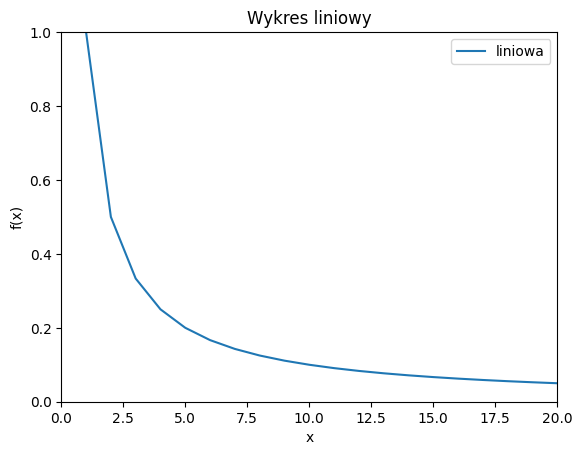

In [12]:
x = np.arange(1,21)
y = 1 / x
plt.plot(x, y, label='liniowa')
plt.title("Wykres liniowy")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0, len(x))
plt.ylim(0, 1)
plt.axis([0, 20, 0, 1])
plt.legend()
plt.show()

zadanie 2

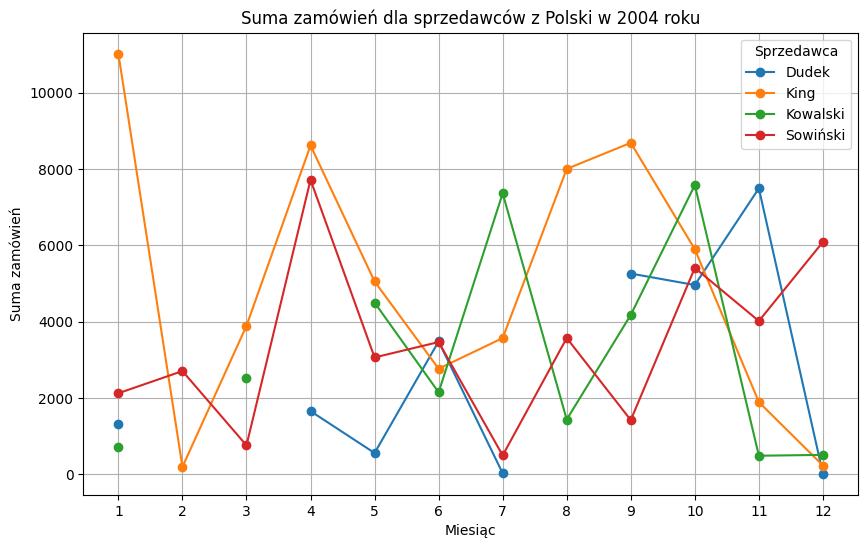

In [13]:
import pandas as pd
df_zam = pd.read_csv('/content/zamowienia.csv', sep=';')

df_zam['Data zamowienia'] = pd.to_datetime(df_zam['Data zamowienia'])
df_zam['Rok'] = df_zam['Data zamowienia'].dt.year
df_zam['Miesiac'] = df_zam['Data zamowienia'].dt.month

df_polska_2004 = df_zam[(df_zam['Kraj'] == 'Polska') & (df_zam['Rok'] == 2004)]

df_grouped = df_polska_2004.groupby(['Sprzedawca', 'Miesiac']).agg({'Utarg': 'sum'}).unstack(level=0)

plt.figure(figsize=(10, 6))
for sprzedawca in df_grouped['Utarg'].columns:
    plt.plot(df_grouped.index, df_grouped['Utarg'][sprzedawca], label=sprzedawca, marker='o')

plt.xlabel('Miesiąc')
plt.ylabel('Suma zamówień')
plt.title('Suma zamówień dla sprzedawców z Polski w 2004 roku')
plt.xticks(range(1, 13))
plt.legend(title='Sprzedawca')
plt.grid(True)
plt.show()

zadanie 3

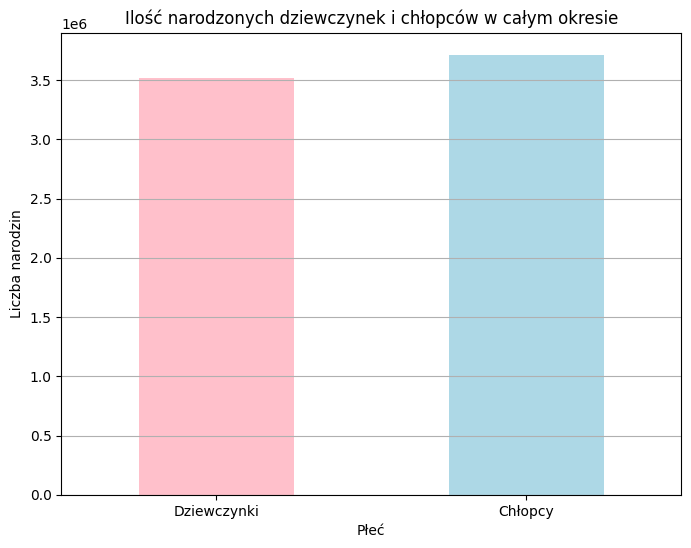

<Figure size 1200x600 with 0 Axes>

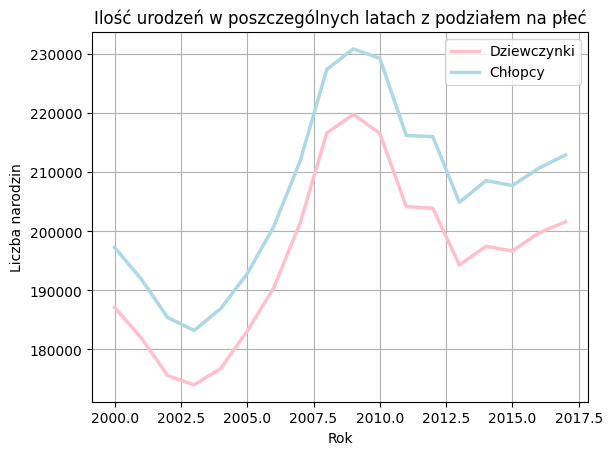

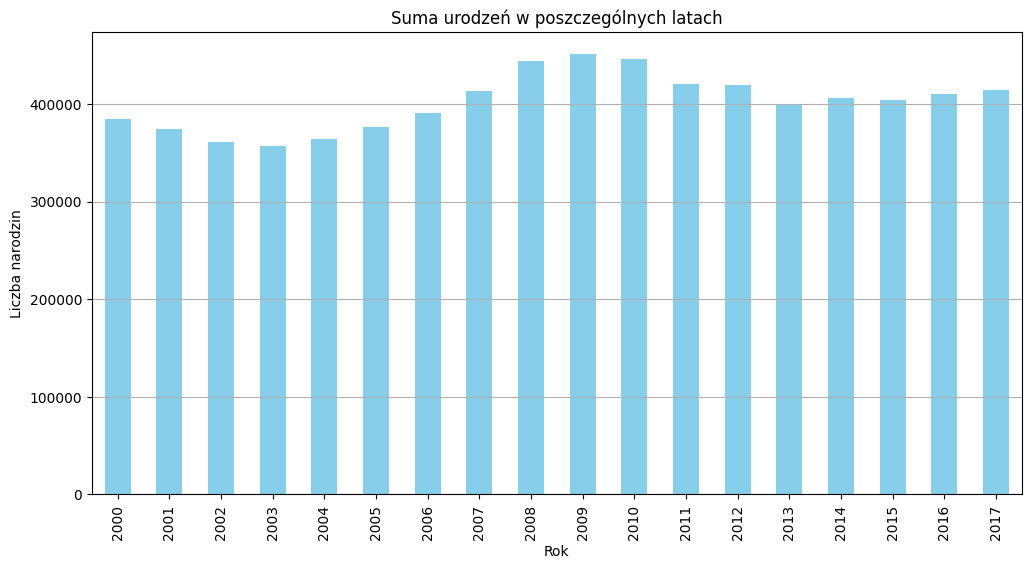

In [19]:
import matplotlib.pyplot as plt

imiona = pd.read_excel('imiona.xlsx')
plt.figure(figsize=(8, 6))
plec = imiona.groupby('Plec')['Liczba'].sum()
plec.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Ilość narodzonych dziewczynek i chłopców w całym okresie')
plt.xlabel('Płeć')
plt.ylabel('Liczba narodzin')
plt.xticks([0, 1], ['Dziewczynki', 'Chłopcy'], rotation=0)
plt.grid(True, axis='y')
plt.show()
plt.figure(figsize=(12, 6))
rok_plec = imiona.groupby(['Rok', 'Plec'])['Liczba'].sum().unstack()
rok_plec.plot(color=['pink', 'lightblue'], linewidth=2.5)
plt.title('Ilość urodzeń w poszczególnych latach z podziałem na płeć')
plt.xlabel('Rok')
plt.ylabel('Liczba narodzin')
plt.grid(True)
plt.legend(['Dziewczynki', 'Chłopcy'])
plt.show()
plt.figure(figsize=(12, 6))
rok = imiona.groupby('Rok')['Liczba'].sum()
rok.plot(kind='bar', color='skyblue')
plt.title('Suma urodzeń w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba narodzin')
plt.grid(True, axis='y')
plt.show()

zadanie 4

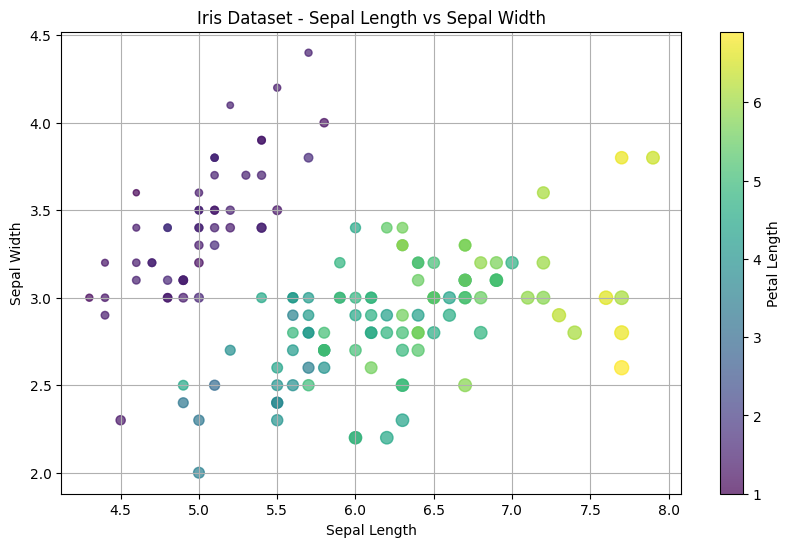

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
x = iris['sepal_length']
y = iris['sepal_width']
c = iris['petal_length']
s = abs(x - y) * 20
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=c, s=s, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Petal Length')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()

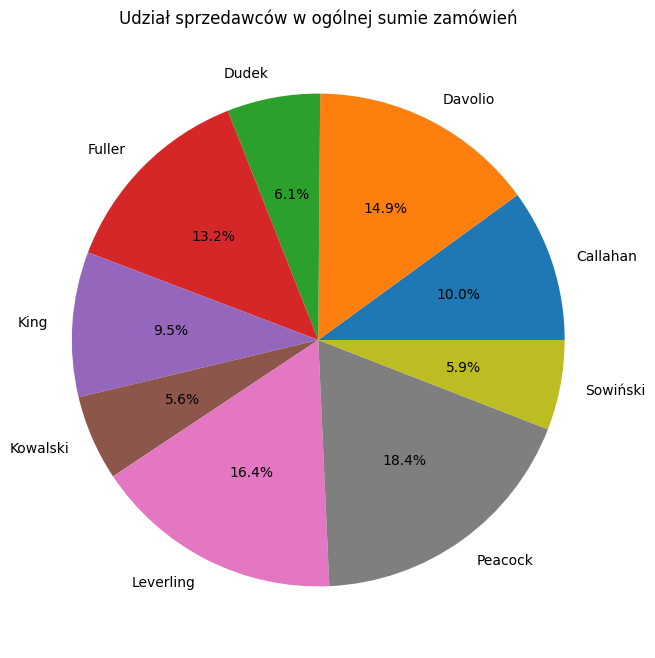

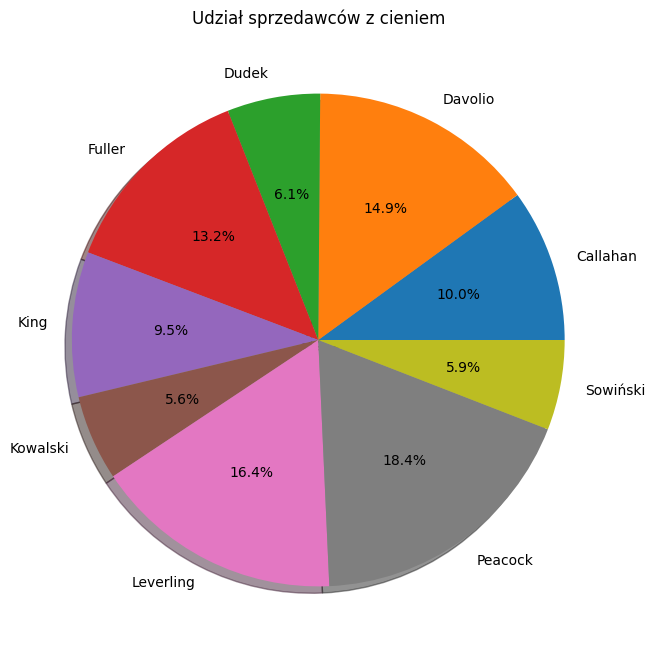

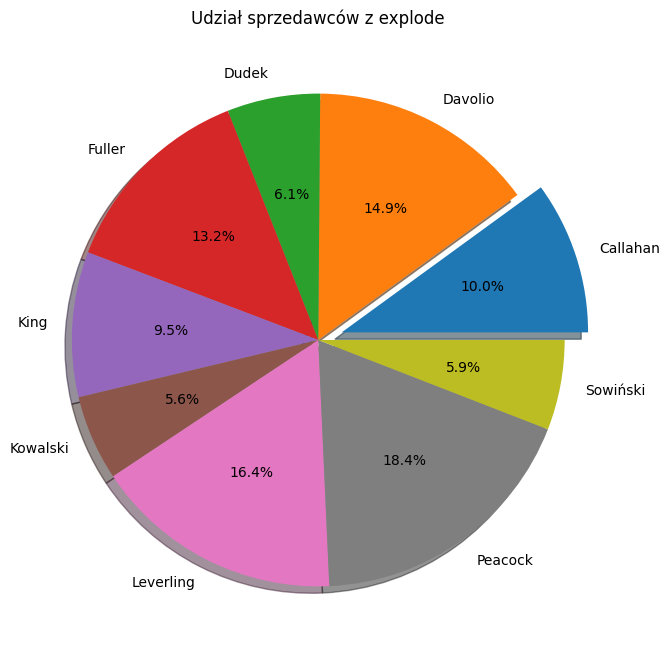

In [17]:
#zad5

df_sprzedawcy = df_zam.groupby('Sprzedawca')['Utarg'].sum()
plt.figure(figsize=(8, 8))
plt.pie(df_sprzedawcy, labels=df_sprzedawcy.index, autopct='%1.1f%%')
plt.title('Udział sprzedawców w ogólnej sumie zamówień')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df_sprzedawcy, labels=df_sprzedawcy.index, autopct='%1.1f%%', shadow=True)
plt.title('Udział sprzedawców z cieniem')
plt.show()
explode = [0.1 if i == 0 else 0 for i in range(len(df_sprzedawcy))]
plt.figure(figsize=(8, 8))
plt.pie(df_sprzedawcy, labels=df_sprzedawcy.index, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title('Udział sprzedawców z explode')
plt.show()
plt.show()